## A/B Testing Case Study

A/B testing helps in finding a better approach to finding customers, marketing products, getting a higher reach, or anything that helps a business convert most of its target customers into actual customers.

Below are all the features in the dataset:

1. Campaign Name: The name of the campaign
2. Date: Date of the record
3. Spend: Amount spent on the campaign in dollars
4. of Impressions: Number of impressions the ad crossed through the campaign
5. Reach: The number of unique impressions received in the ad
6. of Website Clicks: Number of website clicks received through the ads
7. of Searches: Number of users who performed searches on the website 
8. of View Content: Number of users who viewed content and products on the website
9. of Add to Cart: Number of users who added products to the cart
10. of Purchase: Number of purchases


Two campaigns were performed by the company:

1. Control Campaign
2. Test Campaign

Perform A/B testing to find the best campaign for the company to get more customers.

In [34]:
#Importing all key libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline



In [43]:
#Opening the data 

control_df = pd.read_csv("control_group.csv")
test_df = pd.read_csv("test_group.csv")


In [44]:
control_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
test_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [46]:
control_data = control_df.copy()
test_data = test_df.copy()

In [47]:
# As we can see the columns name is not well written we need to change

def to_rename_col(data):
    return data.strip().lower().replace("[usd]","usd").replace("# ","").replace("of ","").replace(" ","_")

In [48]:
control_df.rename(columns = to_rename_col , inplace = True)
test_df.rename(columns = to_rename_col, inplace = True)

In [49]:
control_df.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
test_df.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [56]:
#Lets check if both tables have an identical shape
print("The shape of control data is: ",control_df.shape)
print("The shape of test data is: ",test_df.shape)

The shape of control data is:  (30, 10)
The shape of test data is:  (30, 10)


In [57]:
control_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   campaign_name   30 non-null     object 
 1   date            30 non-null     object 
 2   spend_usd       30 non-null     int64  
 3   impressions     29 non-null     float64
 4   reach           29 non-null     float64
 5   website_clicks  29 non-null     float64
 6   searches        29 non-null     float64
 7   view_content    29 non-null     float64
 8   add_to_cart     29 non-null     float64
 9   purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [58]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   campaign_name   30 non-null     object
 1   date            30 non-null     object
 2   spend_usd       30 non-null     int64 
 3   impressions     30 non-null     int64 
 4   reach           30 non-null     int64 
 5   website_clicks  30 non-null     int64 
 6   searches        30 non-null     int64 
 7   view_content    30 non-null     int64 
 8   add_to_cart     30 non-null     int64 
 9   purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [59]:
# We can see there are some null values, let's simplify to get a clear picture
def null_value(data):
    data = data.isnull().sum()
    data = data[data>0].sort_values(ascending = False)
    return data

In [60]:
null_value(control_df)

impressions       1
reach             1
website_clicks    1
searches          1
view_content      1
add_to_cart       1
purchase          1
dtype: int64

In [61]:
null_value(test_df)

Series([], dtype: int64)

In [65]:
control_df.columns

Index(['campaign_name', 'date', 'spend_usd', 'impressions', 'reach',
       'website_clicks', 'searches', 'view_content', 'add_to_cart',
       'purchase'],
      dtype='object')

In [69]:
# We can fill this null values in control data using mean

control_df['impressions'].fillna(value = control_df['impressions'].mean(),inplace = True)
control_df['reach'].fillna(value = control_df['reach'].mean(),inplace = True)
control_df['website_clicks'].fillna(value = control_df['website_clicks'].mean(),inplace = True)
control_df['searches'].fillna(value = control_df['searches'].mean(),inplace = True)
control_df['view_content'].fillna(value = control_df['view_content'].mean(),inplace = True)
control_df['add_to_cart'].fillna(value = control_df['add_to_cart'].mean(),inplace = True)
control_df['purchase'].fillna(value = control_df['purchase'].mean(),inplace = True)

In [71]:
null_value(control_df)

Series([], dtype: int64)

In [72]:
control_df.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,1.08.2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000
1,Control Campaign,2.08.2019,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000
2,Control Campaign,3.08.2019,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000
3,Control Campaign,4.08.2019,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000
4,Control Campaign,5.08.2019,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103


In [73]:
Final_df = control_df.merge(test_df,how = 'outer').sort_values(["date"])

In [75]:
Final_df = Final_df.reset_index(drop=True)
Final_df.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


In [76]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   campaign_name   60 non-null     object 
 1   date            60 non-null     object 
 2   spend_usd       60 non-null     int64  
 3   impressions     60 non-null     float64
 4   reach           60 non-null     float64
 5   website_clicks  60 non-null     float64
 6   searches        60 non-null     float64
 7   view_content    60 non-null     float64
 8   add_to_cart     60 non-null     float64
 9   purchase        60 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.8+ KB


In [78]:
from datetime import datetime 
Final_df['date'] = pd.to_datetime(Final_df['date'])

In [79]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   campaign_name   60 non-null     object        
 1   date            60 non-null     datetime64[ns]
 2   spend_usd       60 non-null     int64         
 3   impressions     60 non-null     float64       
 4   reach           60 non-null     float64       
 5   website_clicks  60 non-null     float64       
 6   searches        60 non-null     float64       
 7   view_content    60 non-null     float64       
 8   add_to_cart     60 non-null     float64       
 9   purchase        60 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 4.8+ KB


In [80]:
Final_df['campaign_name'].value_counts()

Control Campaign    30
Test Campaign       30
Name: campaign_name, dtype: int64

The dataset has 30 samples for each campaign. Now let’s start with A/B testing to find the best marketing strategy.

In [81]:
Final_df.head(10)

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,2019-01-08,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,2019-01-08,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,2019-10-08,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,2019-10-08,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,2019-11-08,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0
5,Control Campaign,2019-11-08,2490,115247.0,95843.0,8137.0,2941.0,2486.0,1887.0,475.0
6,Test Campaign,2019-12-08,2831,124591.0,10598.0,8264.0,2081.0,1992.0,1382.0,709.0
7,Control Campaign,2019-12-08,2319,116639.0,100189.0,2993.0,1397.0,1147.0,1439.0,794.0
8,Test Campaign,2019-08-13,1972,65827.0,49531.0,7568.0,2213.0,2058.0,1391.0,812.0
9,Control Campaign,2019-08-13,2697,82847.0,68214.0,6554.0,2390.0,1975.0,1794.0,766.0


In [137]:
d1 = Final_df.groupby(['campaign_name'])['spend_usd'].sum()
data_spent = Final_df.groupby(['campaign_name'])['spend_usd'].sum().reset_index()

In [138]:
data_spent

,campaign_name,spend_usd
0,Control Campaign,68653
1,Test Campaign,76892


In [135]:
data_spent.columns

Index(['campaign_name', 'spend_usd'], dtype='object')

In [136]:
data_spent.values

array([['Control Campaign', 68653],
       ['Test Campaign', 76892]], dtype=object)

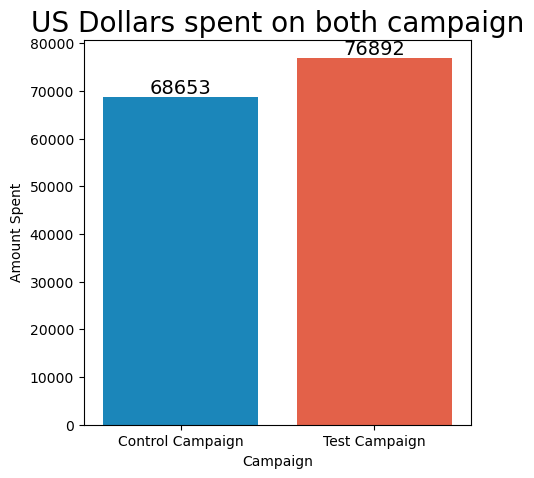

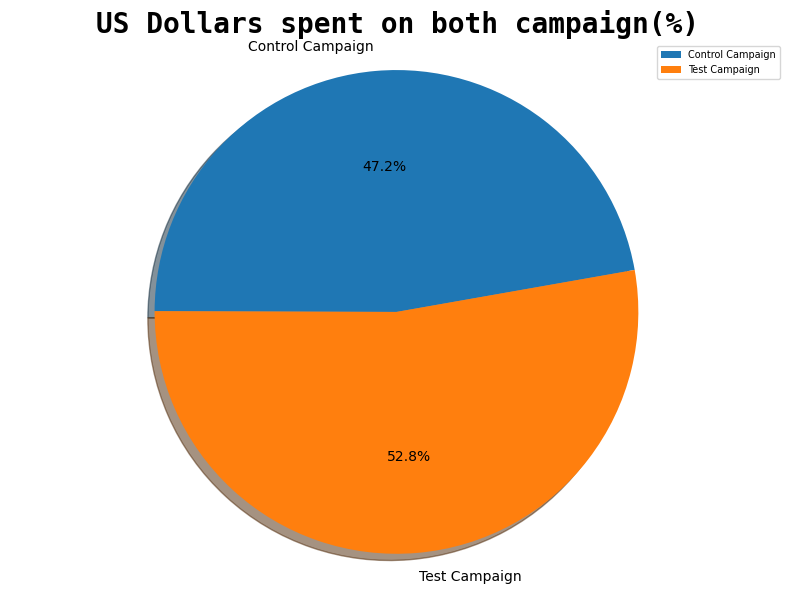

In [191]:
fig,axes = plt.subplots(figsize = (5,5))

plt.style.use('fivethirtyeight')
ax = sns.barplot(data = data_spent, x = 'campaign_name', y ='spend_usd');
ax.bar_label(container=ax.containers[0])
plt.title('US Dollars spent on both campaign')
plt.xlabel('Campaign')          
plt.ylabel('Amount Spent')
plt.show()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(data_spent['spend_usd'], labels=data_spent['campaign_name'], startangle=10, shadow=True, autopct='%1.1f%%')
plt.title('US Dollars spent on both campaign(%)', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()




As we can clearly see amount of money spent on Test Campaign is slightly higher than Control Campaign. Lets analyze the relationship between the number of impressions we got from both campaigns and the amount spent on both campaigns:

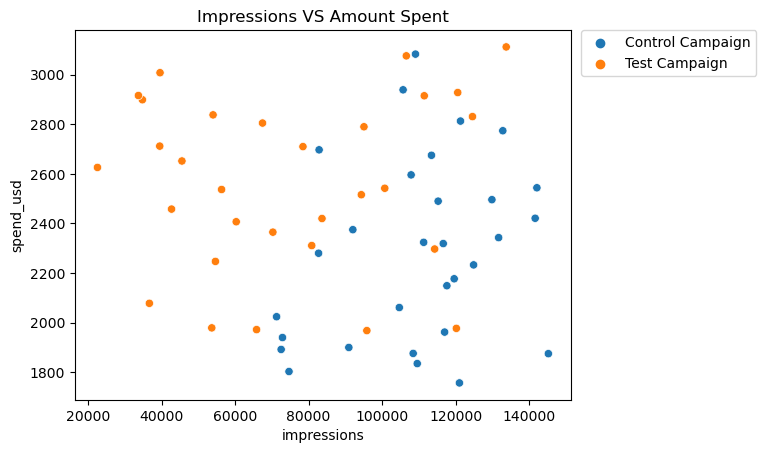

In [207]:
sns.scatterplot(data = Final_df, x= 'impressions', y = 'spend_usd',hue = 'campaign_name' )
plt.title("Impressions VS Amount Spent")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);


The control campaign resulted in more impressions according to the amount spent on both campaigns.

Now let’s have a look at the number of searches performed on the website from both campaigns:

In [180]:
data_searches = Final_df.groupby(['campaign_name'])['searches'].sum().reset_index()
data_searches

,campaign_name,searches
0,Control Campaign,66639.310345
1,Test Campaign,72569.000000


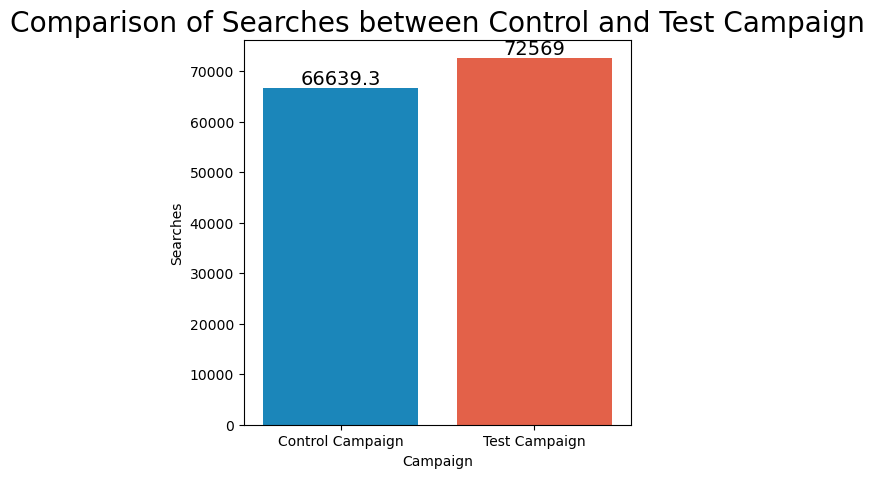

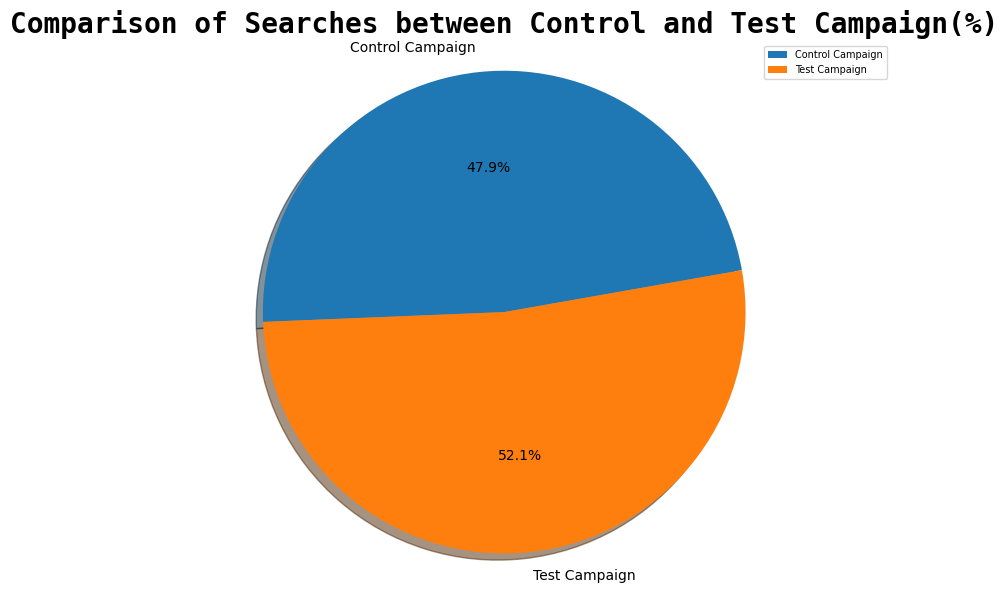

In [192]:
fig,axes = plt.subplots(figsize = (5,5))

plt.style.use('fivethirtyeight')
ax = sns.barplot(data = data_searches, x = 'campaign_name', y ='searches');
ax.bar_label(container=ax.containers[0])
plt.title('Comparison of Searches between Control and Test Campaign')
plt.xlabel('Campaign')          
plt.ylabel('Searches')
plt.show()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(data_searches['searches'], labels=data_spent['campaign_name'], startangle=10, shadow=True, autopct='%1.1f%%')
plt.title('Comparison of Searches between Control and Test Campaign(%)', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()


The test campaign resulted in more searches on the website.

Now let’s have a look at the number of website clicks from both campaigns:

In [183]:
data_clicks = Final_df.groupby(['campaign_name'])['website_clicks'].sum().reset_index()
data_clicks

,campaign_name,website_clicks
0,Control Campaign,159623.793103
1,Test Campaign,180970.000000


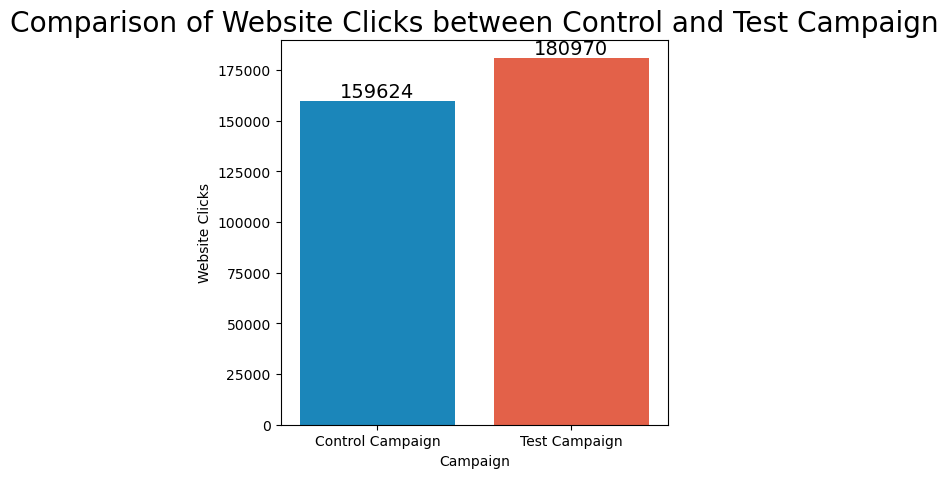

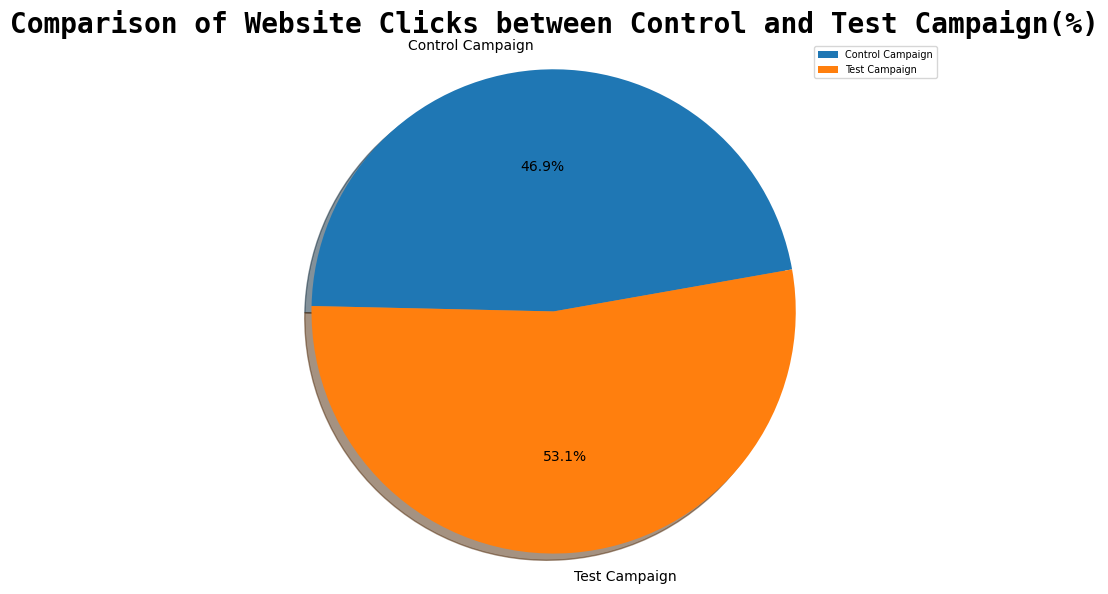

In [193]:
fig,axes = plt.subplots(figsize = (5,5))

plt.style.use('fivethirtyeight')
ax = sns.barplot(data = data_clicks, x = 'campaign_name', y ='website_clicks');
ax.bar_label(container=ax.containers[0])
plt.title('Comparison of Website Clicks between Control and Test Campaign')
plt.xlabel('Campaign')          
plt.ylabel('Website Clicks')
plt.show()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(data_clicks['website_clicks'], labels=data_spent['campaign_name'], startangle=10, shadow=True, autopct='%1.1f%%')
plt.title('Comparison of Website Clicks between Control and Test Campaign(%)', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()


The test campaign wins in the number of website clicks. Now let’s have a look at the amount of content viewed after reaching the website from both campaigns:

In [194]:
data_views = Final_df.groupby(['campaign_name'])['view_content'].sum().reset_index()
data_views

,campaign_name,view_content
0,Control Campaign,58313.793103
1,Test Campaign,55740.000000


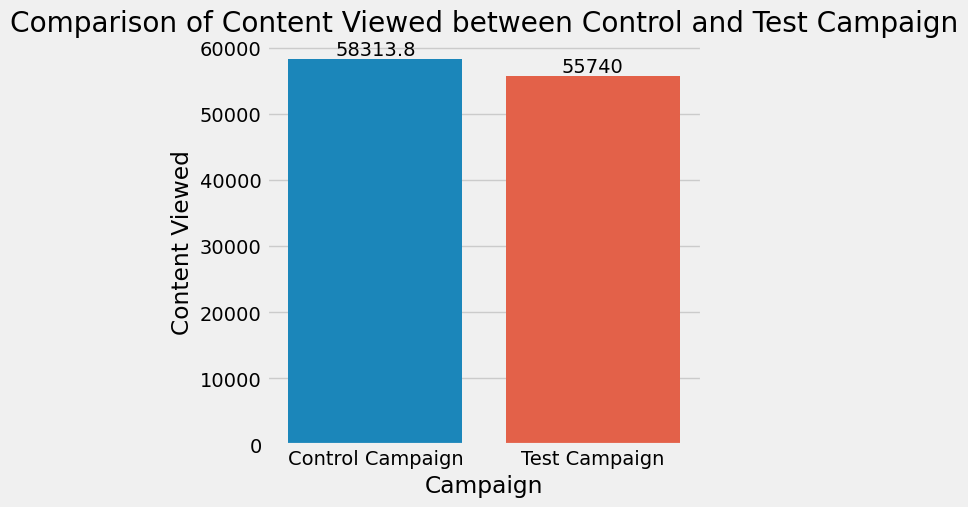

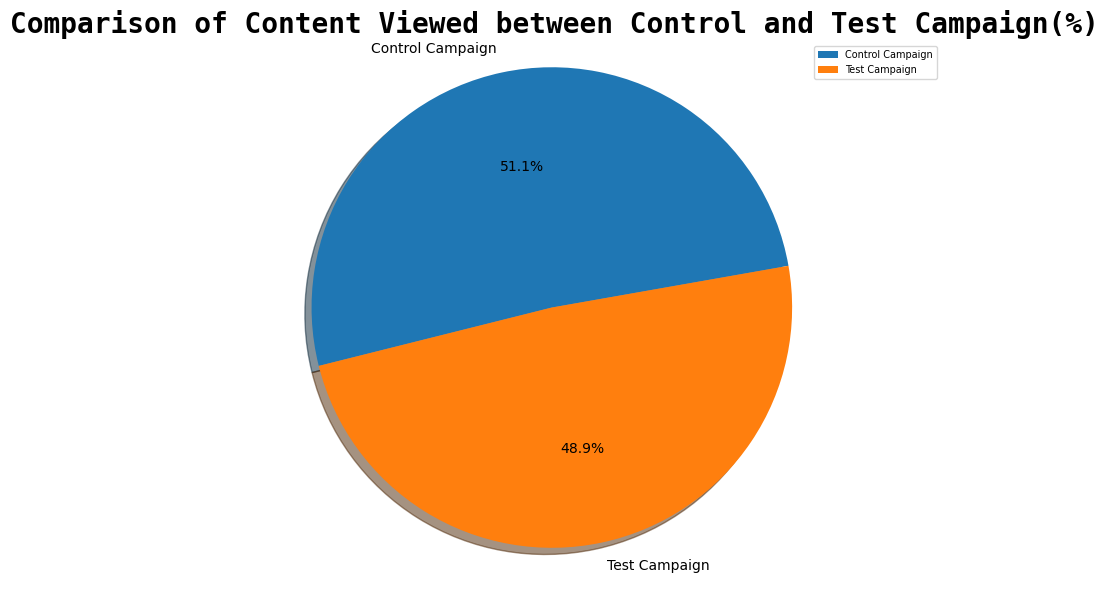

In [196]:
fig,axes = plt.subplots(figsize = (5,5))

plt.style.use('fivethirtyeight')
ax = sns.barplot(data = data_views, x = 'campaign_name', y ='view_content');
ax.bar_label(container=ax.containers[0])
plt.title('Comparison of Content Viewed between Control and Test Campaign')
plt.xlabel('Campaign')          
plt.ylabel('Content Viewed')
plt.show()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(data_views['view_content'], labels=data_spent['campaign_name'], startangle=10, shadow=True, autopct='%1.1f%%')
plt.title('Comparison of Content Viewed between Control and Test Campaign(%)', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()


The audience of the control campaign viewed more content than the test campaign. Although there is not much difference, as the website clicks of the control campaign were low, its engagement on the website is higher than the test campaign.

Now let’s have a look at the number of products added to the cart from both campaigns:

In [197]:
data_cart = Final_df.groupby(['campaign_name'])['add_to_cart'].sum().reset_index()
data_cart

,campaign_name,add_to_cart
0,Control Campaign,39000.0
1,Test Campaign,26446.0


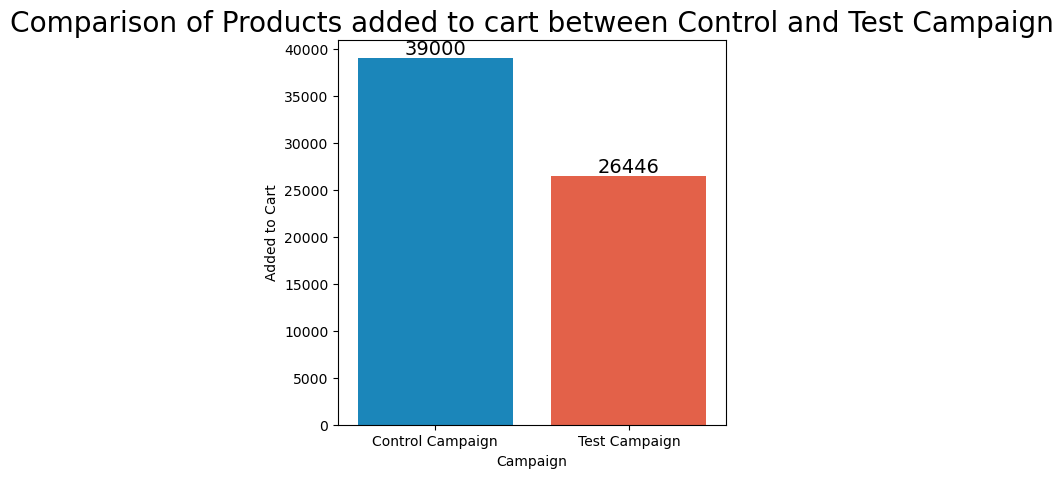

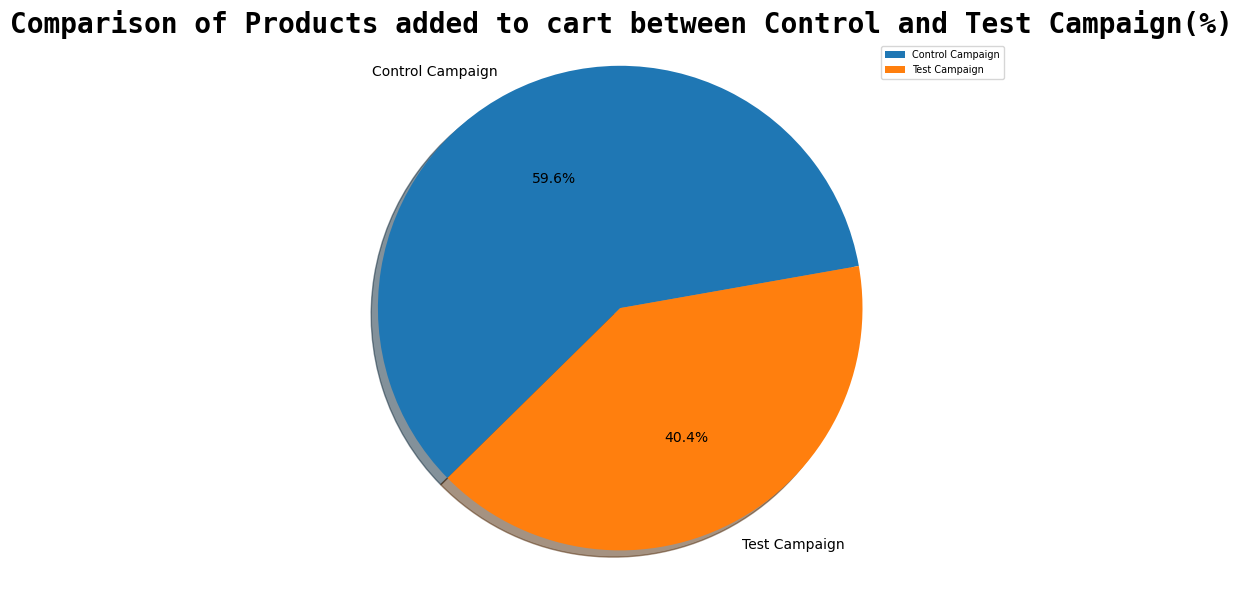

In [198]:
fig,axes = plt.subplots(figsize = (5,5))

plt.style.use('fivethirtyeight')
ax = sns.barplot(data = data_cart, x = 'campaign_name', y ='add_to_cart');
ax.bar_label(container=ax.containers[0])
plt.title('Comparison of Products added to cart between Control and Test Campaign')
plt.xlabel('Campaign')          
plt.ylabel('Added to Cart')
plt.show()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(data_cart['add_to_cart'], labels=data_spent['campaign_name'], startangle=10, shadow=True, autopct='%1.1f%%')
plt.title('Comparison of Products added to cart between Control and Test Campaign(%)', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()


Despite low website clicks more products were added to the cart from the control campaign.

We know, The amount spent on the test campaign is higher than the control campaign. But as we can see that the control campaign resulted in more content views and more products in the cart, the control campaign is more efficient than the test campaign.

Now let’s have a look at the purchases made by both campaigns:

In [199]:
data_purchase = Final_df.groupby(['campaign_name'])['purchase'].sum().reset_index()
data_purchase

,campaign_name,purchase
0,Control Campaign,15683.793103
1,Test Campaign,15637.000000


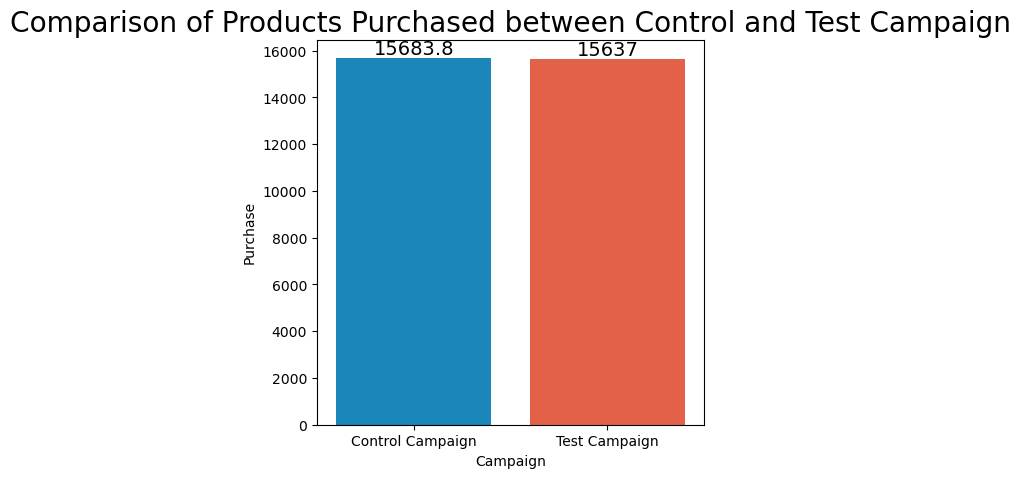

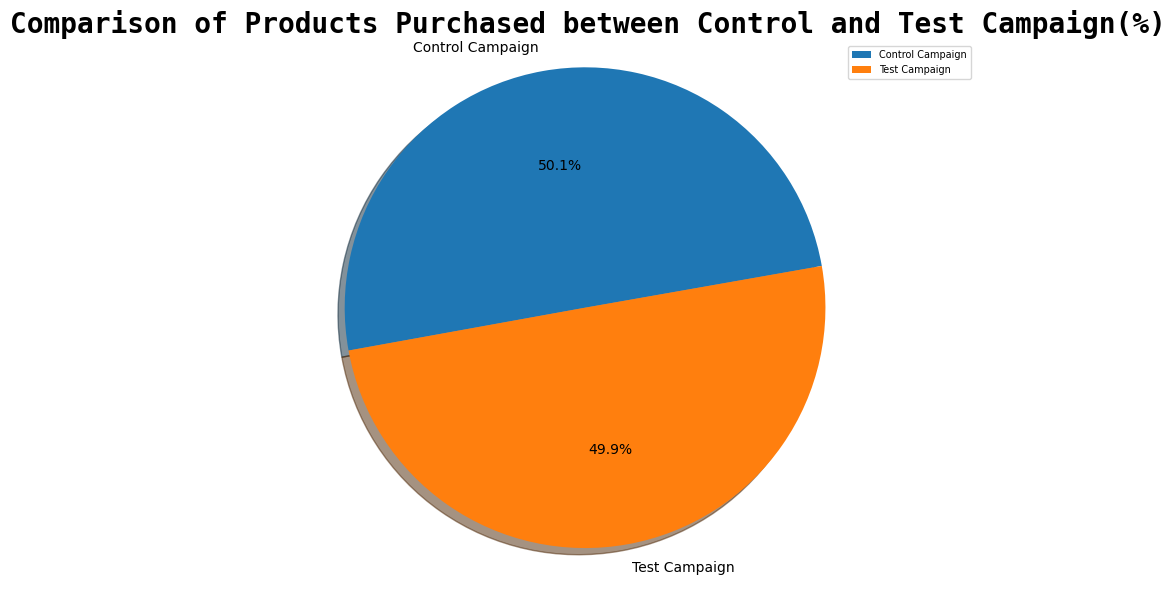

In [200]:
fig,axes = plt.subplots(figsize = (5,5))

plt.style.use('fivethirtyeight')
ax = sns.barplot(data = data_purchase, x = 'campaign_name', y ='purchase');
ax.bar_label(container=ax.containers[0])
plt.title('Comparison of Products Purchased between Control and Test Campaign')
plt.xlabel('Campaign')          
plt.ylabel('Purchase')
plt.show()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(data_purchase['purchase'], labels=data_spent['campaign_name'], startangle=10, shadow=True, autopct='%1.1f%%')
plt.title('Comparison of Products Purchased between Control and Test Campaign(%)', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()


There’s only a difference of around 1% in the purchases made from both ad campaigns. As the Control campaign resulted in more sales in less amount spent on marketing, the control campaign wins here!

Now let’s analyze some metrics to find which ad campaign converts more. I will first look at the relationship between the number of website clicks and content viewed from both campaigns:

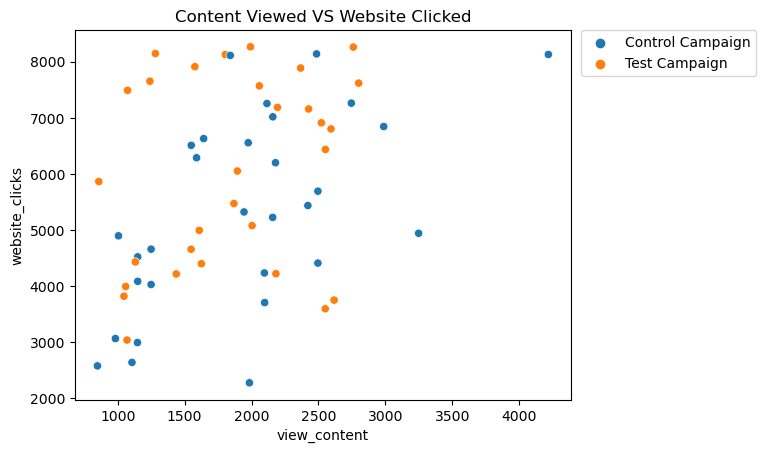

In [206]:
sns.scatterplot(data = Final_df, x= 'view_content', y = 'website_clicks',hue = 'campaign_name' )
plt.title("Content Viewed VS Website Clicked")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

The website clicks are higher in the test campaign, but the engagement from website clicks is higher in the control campaign. So the control campaign wins!

Now I will analyze the relationship between the amount of content viewed and the number of products added to the cart from both campaigns:

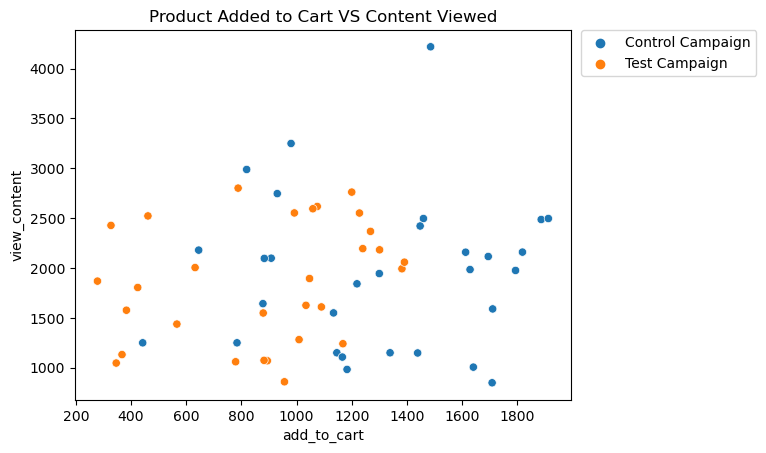

In [205]:
sns.scatterplot(data = Final_df, x= 'add_to_cart', y = 'view_content',hue = 'campaign_name' )
plt.title("Product Added to Cart VS Content Viewed")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

Again, the control campaign wins! Now let’s have a look at the relationship between the number of products added to the cart and the number of sales from both campaigns:

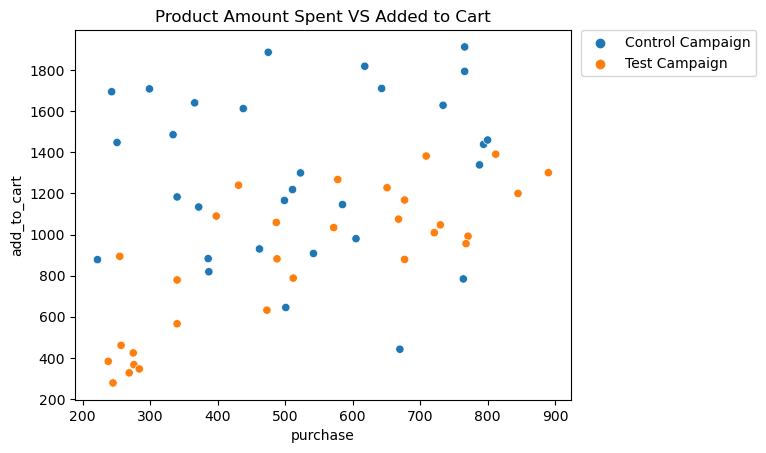

In [208]:
sns.scatterplot(data = Final_df, x= 'purchase', y = 'add_to_cart',hue = 'campaign_name' )
plt.title("Product Amount Spent VS Added to Cart")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

Although the control campaign resulted in more sales and more products in the cart, the conversation rate of the test campaign is higher.

# Conclusion

From the above A/B tests, we found that the control campaign resulted in more sales and engagement from the visitors. More products were viewed from the control campaign, resulting in more products in the cart and more sales. But the conversation rate of products in the cart is higher in the test campaign. The test campaign resulted in more sales according to the products viewed and added to the cart. And the control campaign results in more sales overall. So, the Test campaign can be used to market a specific product to a specific audience, and the Control campaign can be used to market multiple products to a wider audience.
